<a href="https://colab.research.google.com/github/snarvekark/ML_Assignments/blob/main/MidTerm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team BlastOff**

### **Han-Wei Lin**

### **Roger Navarro**

### **Sheetal Narvekar**

# Business Case and Value

This project emphasizes on Heart Disease prevention and prediction using different Machine Learning algorithms and methods. 
You can prevent heart disease by following a heart-healthy lifestyle. Heart disease is a leading cause of death, but it's not inevitable. While you can't change some risk factors there are plenty of ways you can reduce your risk of heart disease.
For this project the UCI Heart dataset is used as the base dataset. There are 76 risk factors in the original dataset. Most research have used 14 high risk factors out of the 76 factors.

# Data Narrative


Will fill out at the end to compare results and analysis

# Data Preparation

### Import Libraries

In [9]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### Import Data

In [10]:
#Read the file
from io import BytesIO
import requests
#r = requests.get('Enter your link here')
#data = r.content
#df= pd.read_csv(BytesIO(data))
df= pd.read_csv('Heart_Disease_UCI.csv')

### Data Fields


Clinical parameters used to determine if a person had Heart Disease

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type values can be 0, 1, 2, 3

trestbps - resting blood pressure 

fbs - fasting blood sugar > 120 mg/dl

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise 

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - thalium stress result

target - have disease or not (1=yes, 0=no)

### Data Information

In [11]:
#Column Inofrmation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#Display the first few records with column heading
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#Collect the statistical data using describe() method

pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


### Pre-process the data

In [14]:
#The target field tells how many people have heart disease, so lets count how many have and how many do not have heart disease

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Heart disease ratio

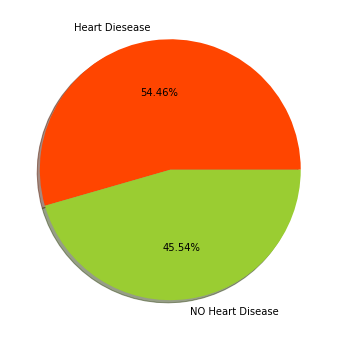

In [15]:
heart_disease_count = len(df[df['target']==1])
no_heart_disease_count = len(df[df['target']==0])
labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease_count, no_heart_disease_count]
colors = ['orangered', 'yellowgreen']
plt.figure(figsize=(8,6))

plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

In [16]:
#Check if there are null values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Feature Importance

### Pair Plot Chart

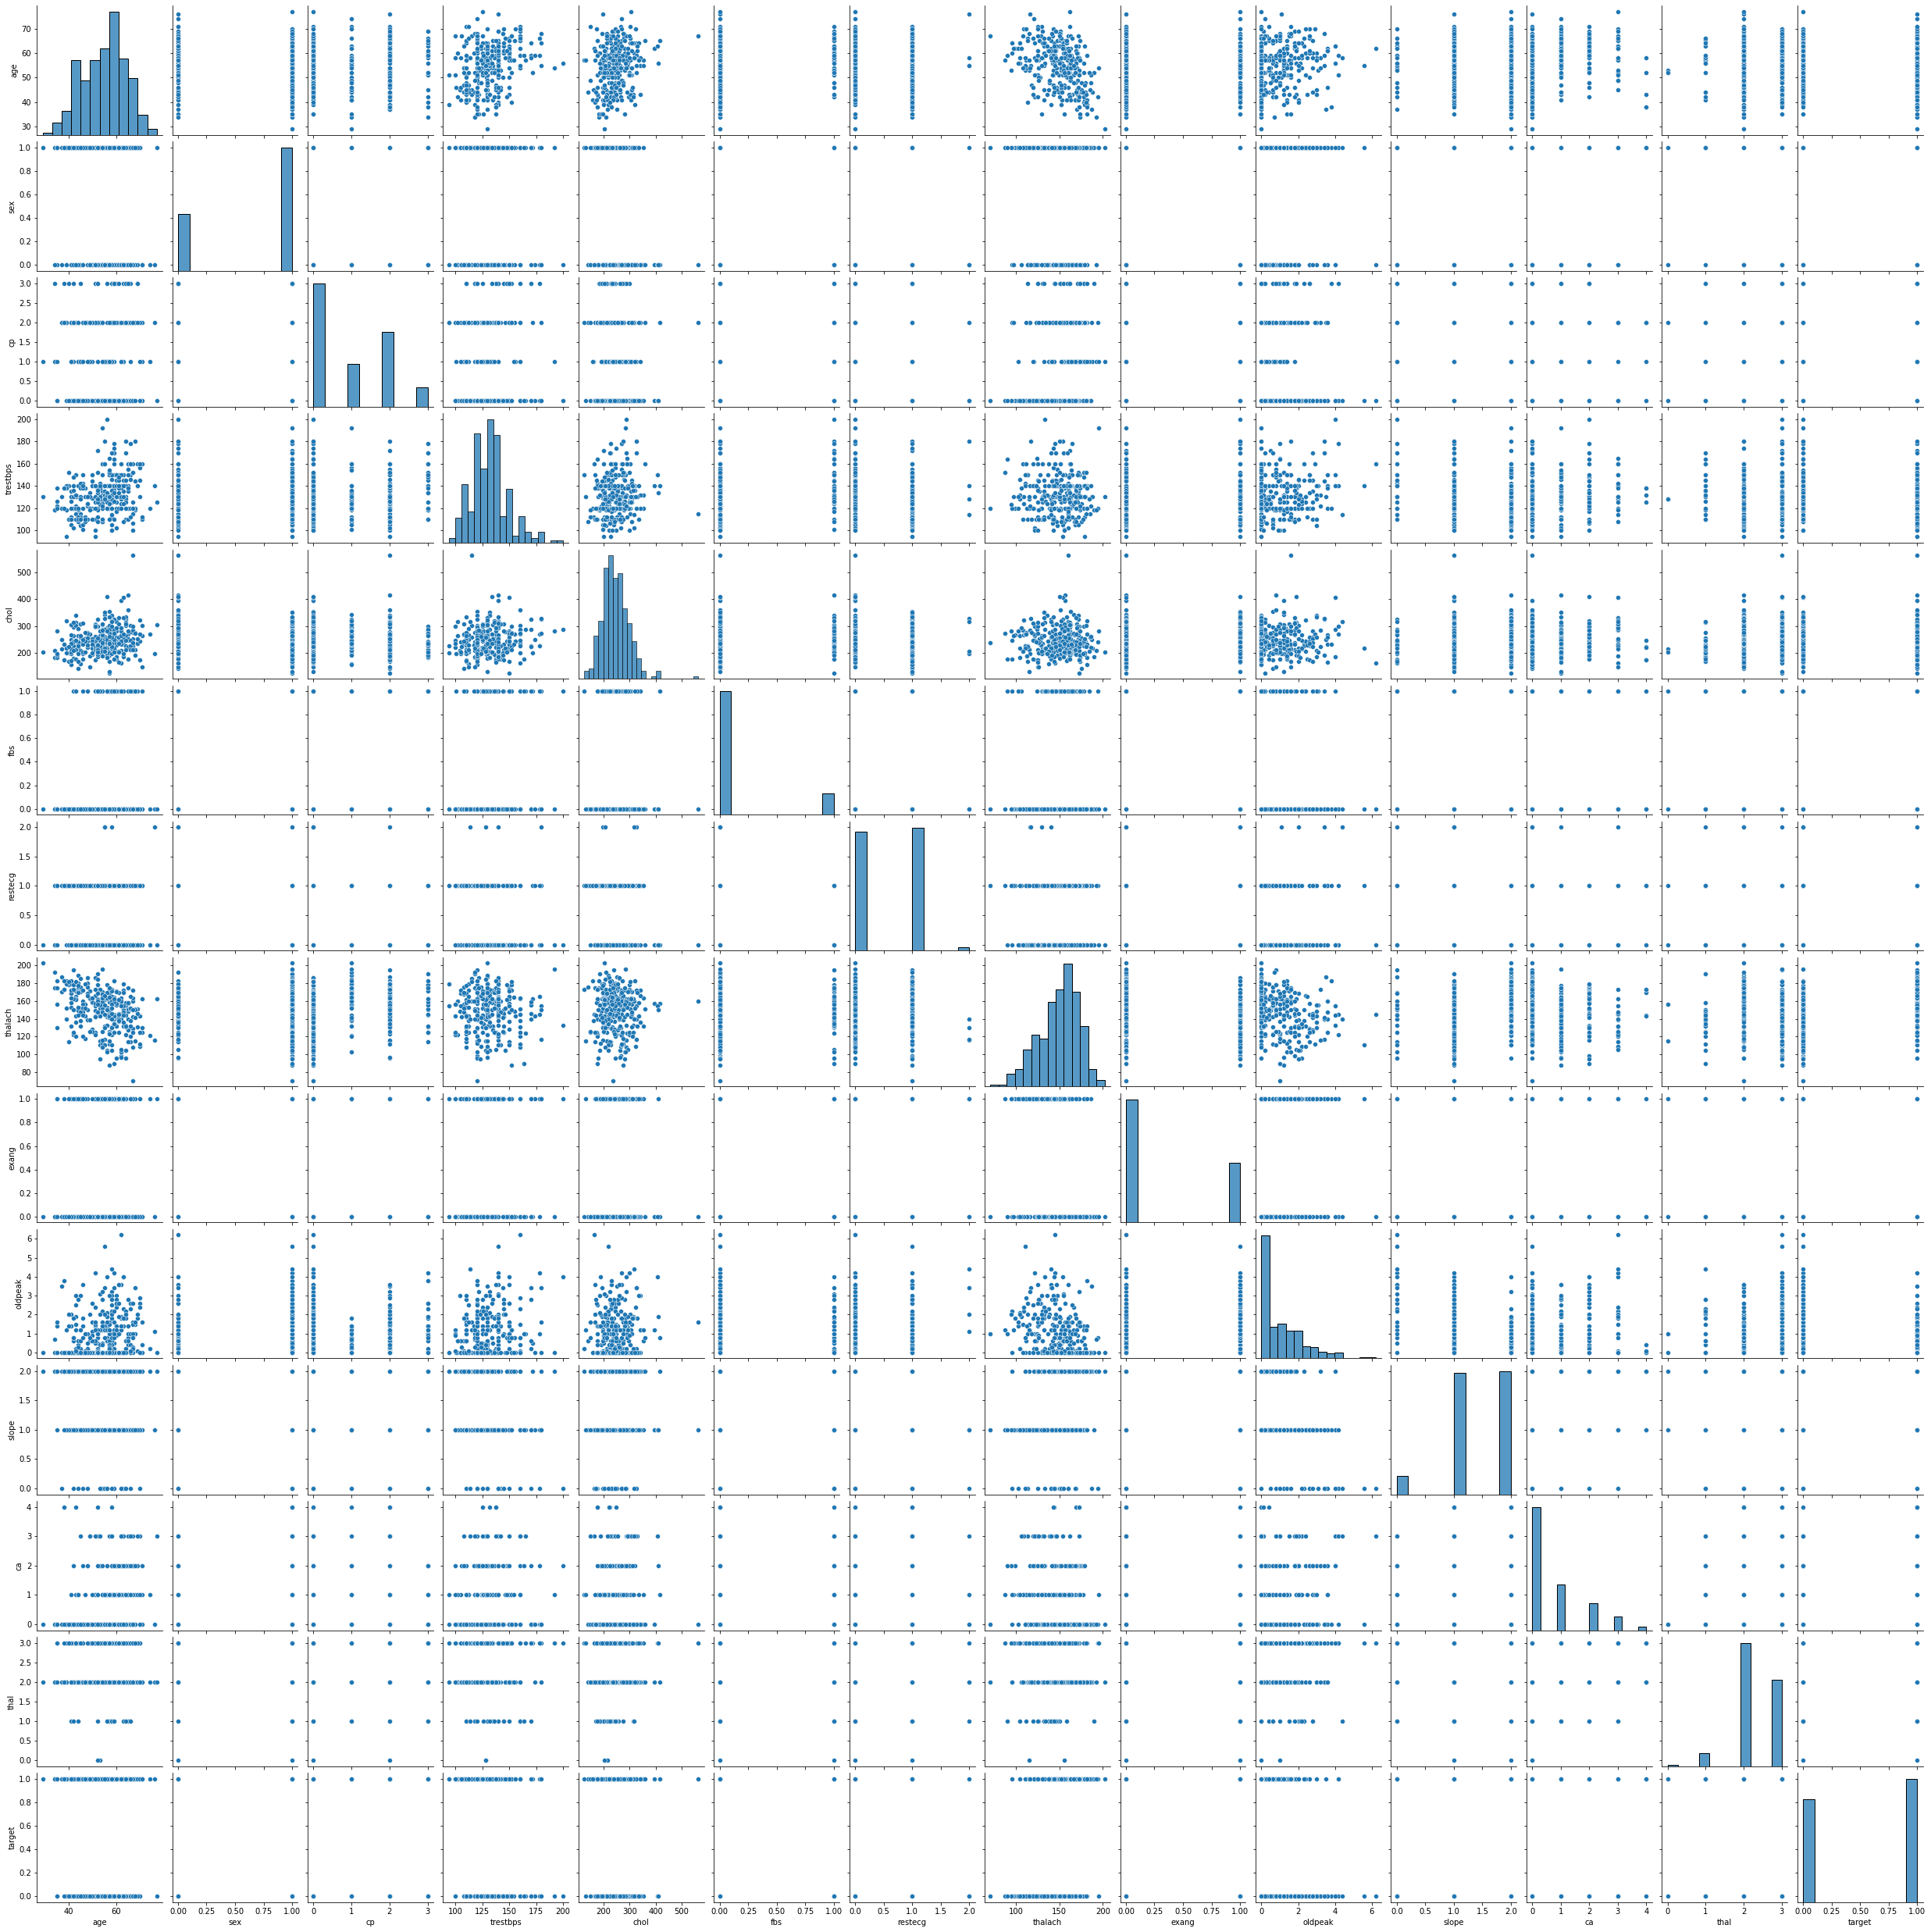

In [17]:
import seaborn as sns # package for visualization (more on seaborn later)
# Data Analysis , Pairplot to see how data is distrubuted or organized.
g = sns.pairplot(df)

### Correlation to find important features

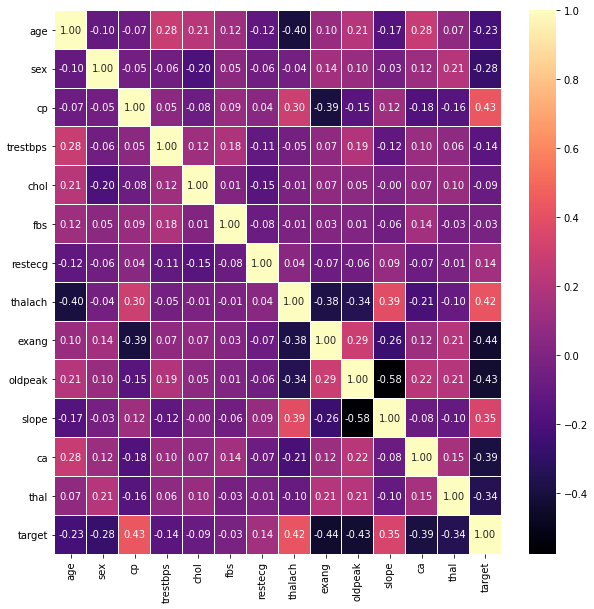

In [18]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### Feature Importance Plot

In [19]:
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [20]:
X = df[col_names] # Features
y = df.target # Target variable

Split the data into Training set and Test data

In [21]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Random Forest Classifier

In [22]:
# Create Random Forest classifer object
clf = RandomForestClassifier(n_estimators=100)

# Train Random Forest Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8241758241758241


### Accuracy using Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
import pandas as pd
pima = df[col_names]
feature_imp = pd.Series(clf.feature_importances_,pima.columns).sort_values(ascending=False)
feature_imp

oldpeak    0.12
cp         0.12
thalach    0.12
ca         0.11
thal       0.10
age        0.08
trestbps   0.08
chol       0.08
exang      0.06
sex        0.05
slope      0.05
restecg    0.02
fbs        0.01
dtype: float64

No handles with labels found to put in legend.


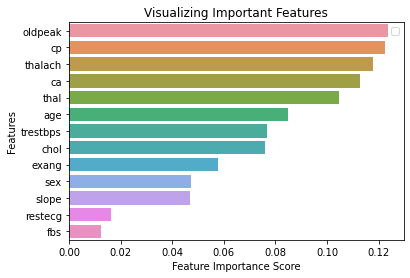

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [27]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

In [28]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7252747252747253


### Accuracy using Decision Tree Classifier

### Plot the Tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


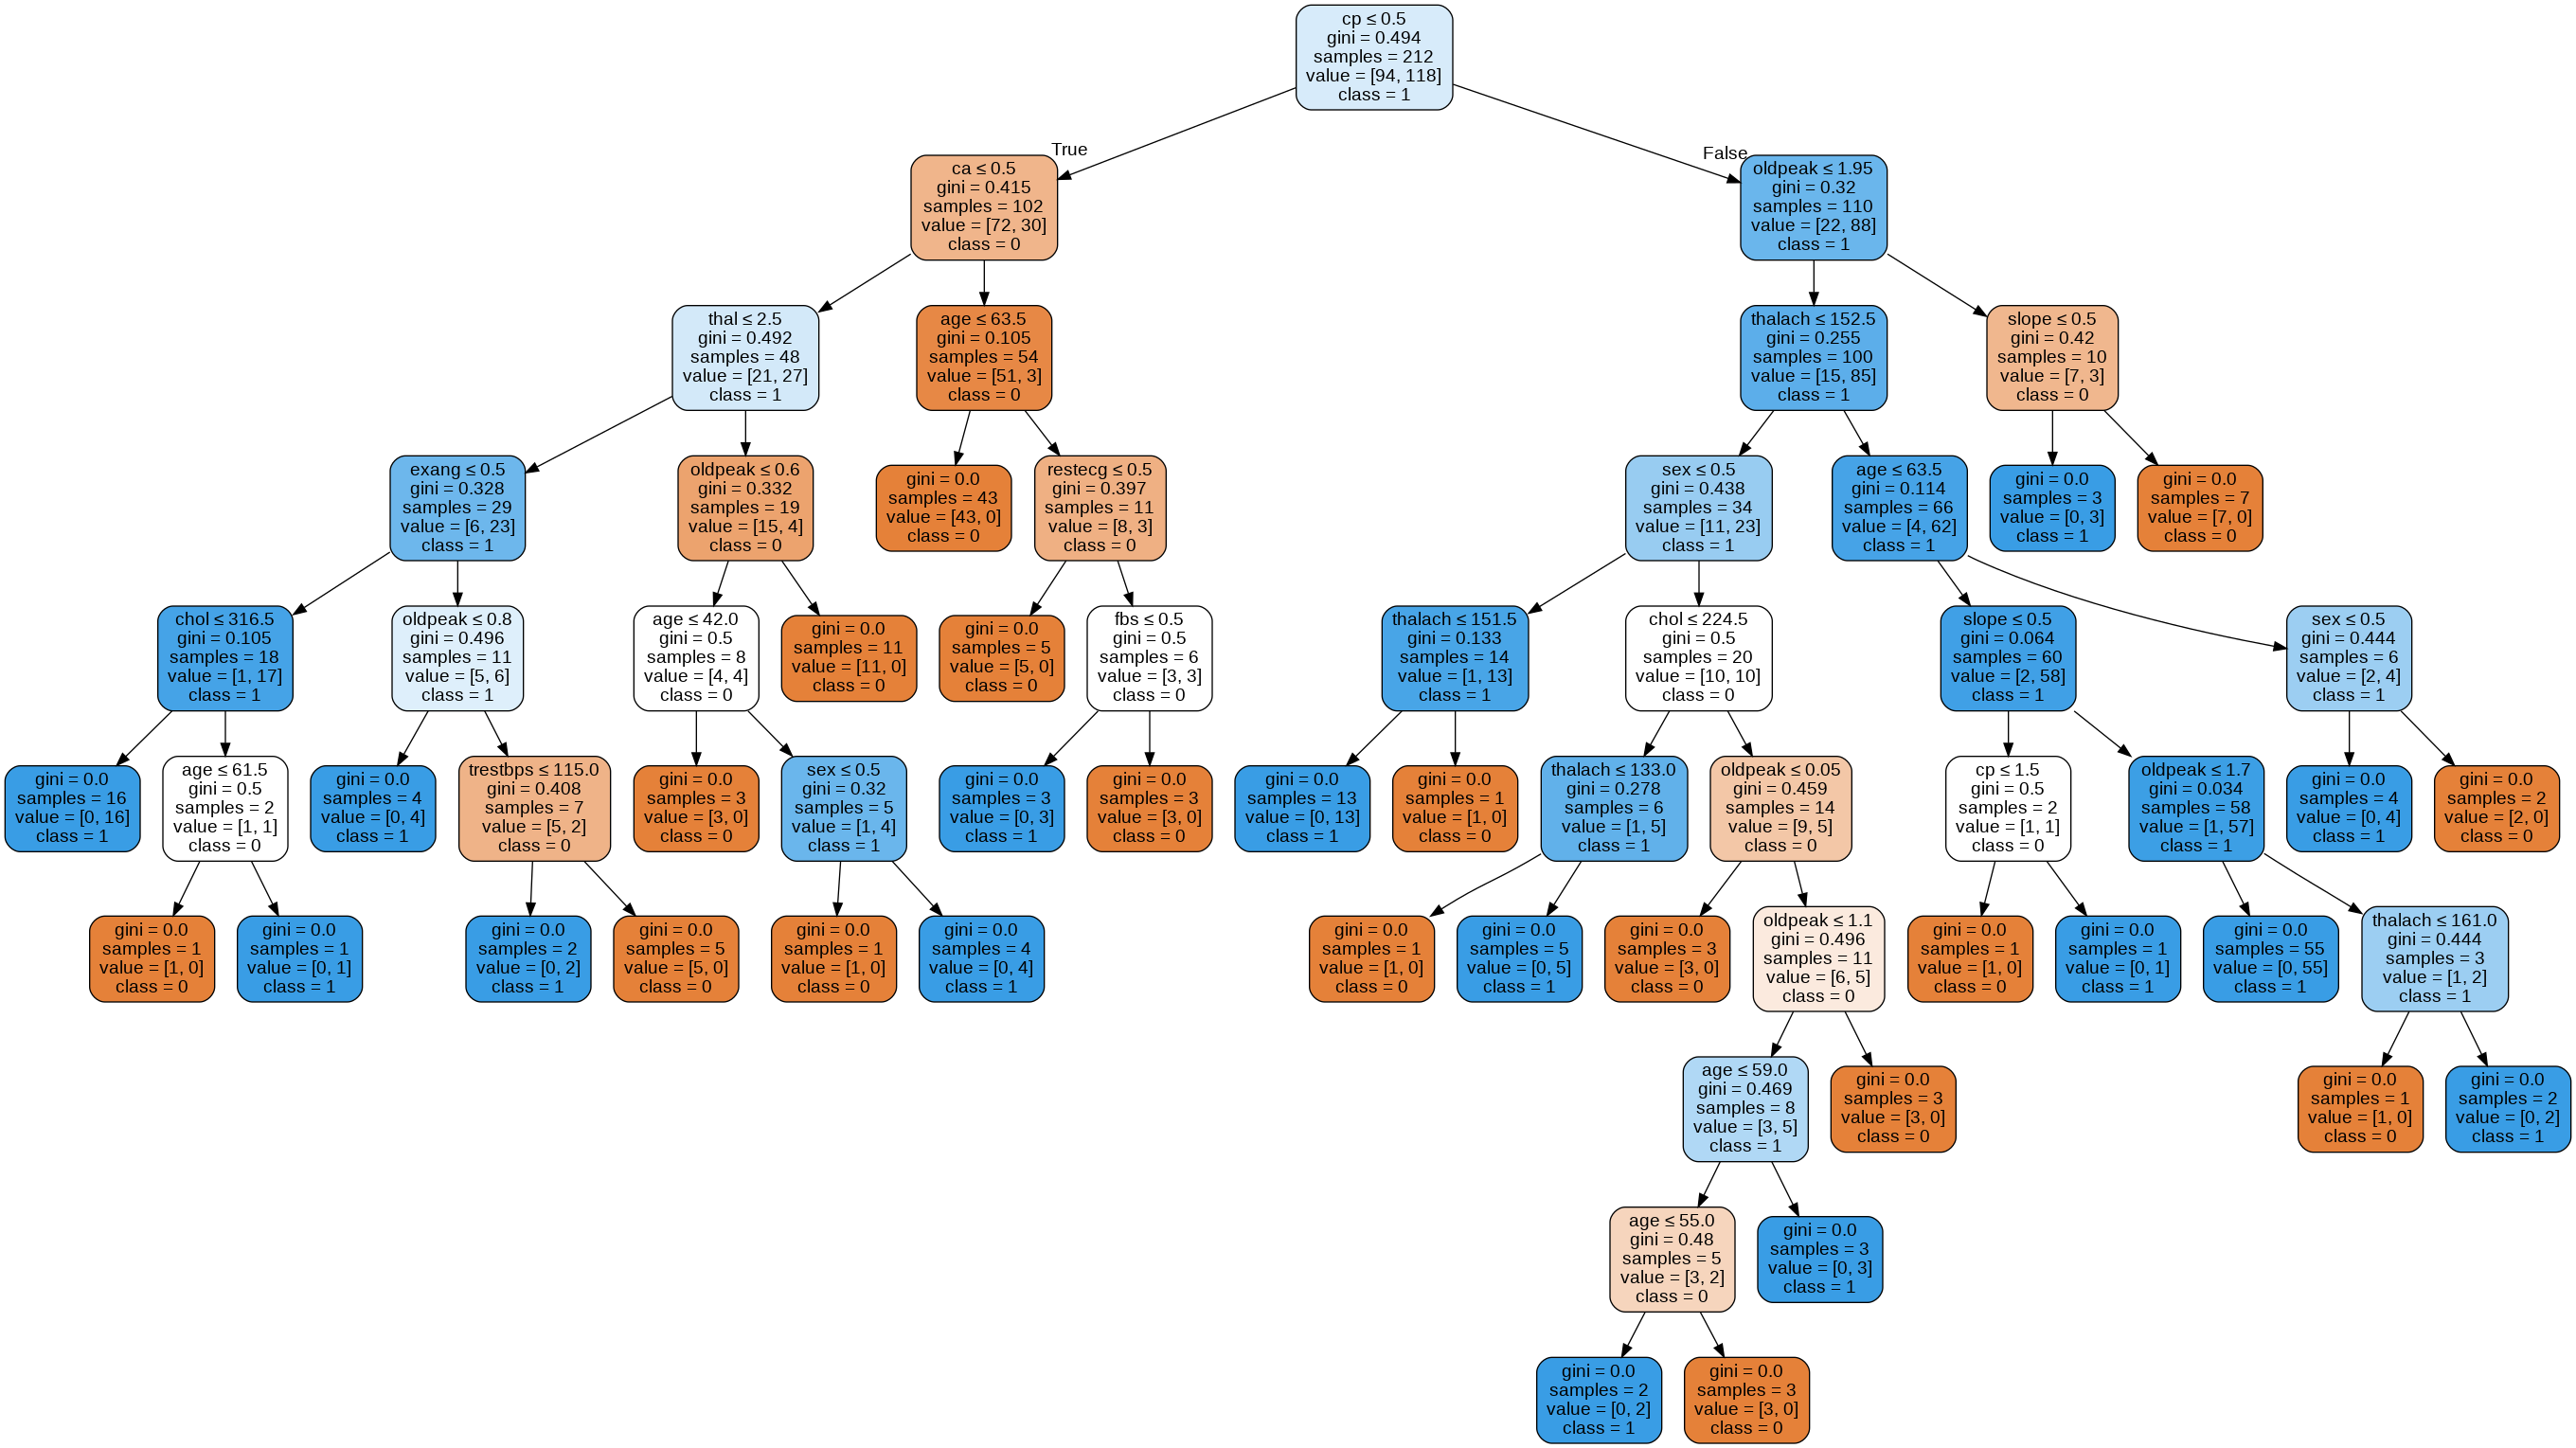

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_disease.png')
Image(graph.create_png())

# Feature Transformation - Part 1

Feature transformation is simply a function that transforms features from one representation to another. We want to reduce the number of features to plot and visualize data, speed up training or improve the accuracy of a specific model

Feature transformation is simply a function that transforms features from one representation to another.

### Categorical Data

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [31]:
#Differentiate Categorical and Numerical Data

categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [32]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [33]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [34]:
#Convert categorical data

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


### PCA (Principal Component Analaysis) Transformation

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data.

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import SpectralClustering

In [37]:
# Performing Standard Scalar Normalization to normalize feature set
from sklearn.preprocessing import StandardScaler, normalize
SC = StandardScaler()
X_Scale= SC.fit_transform(X)
X_Scale = SC.transform(X_Scale)
print(X_Scale)
X_Normalize = normalize(X_Scale)

[[-5.89098283e+00 -4.64939962e-03  9.76491625e-01 ... -5.97182737e+00
  -1.41421986e+00 -7.30027363e+00]
 [-6.20723708e+00 -4.64939962e-03  3.45323773e-02 ... -5.97182737e+00
  -1.41421986e+00 -4.62393851e+00]
 [-6.15858258e+00 -4.62466752e+00 -9.07426870e-01 ... -6.87552016e-01
  -1.41421986e+00 -4.62393851e+00]
 ...
 [-5.83016470e+00 -4.64939962e-03 -1.84938612e+00 ... -3.32968969e+00
   5.04664034e-01 -1.94760339e+00]
 [-5.96396458e+00 -4.64939962e-03 -1.84938612e+00 ... -3.32968969e+00
  -4.54777914e-01 -1.94760339e+00]
 [-5.96396458e+00 -4.62466752e+00 -9.07426870e-01 ... -3.32968969e+00
  -4.54777914e-01 -4.62393851e+00]]


In [38]:
# Converting normalized data to Pandas Dataframe
X_normalize_dataframe = pd.DataFrame(X_Normalize)

In [39]:
# Implementing PCA Algorithm
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalize_dataframe)
PCA_components = pd.DataFrame(X_principal)
PCA_components.columns = ['P1', 'P2']
PCA_components.head()

,P1,P2
0,0.42,-0.09
1,-0.06,0.03
2,-0.10,-0.18
3,-0.12,-0.09
4,-0.10,-0.00


([<matplotlib.axis.XTick at 0x7f18b09360f0>,
 <a list of 2 Text major ticklabel objects>)

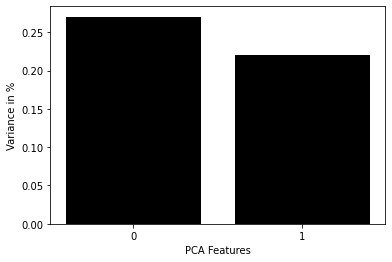

In [40]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA Features')
plt.ylabel('Variance in %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

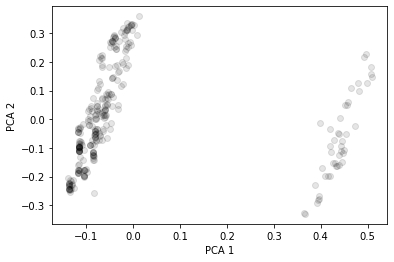

In [41]:
plt.scatter(PCA_components['P1'], PCA_components['P2'], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [42]:
# Spectral Clustering
spectral_model = SpectralClustering(n_clusters = 3, affinity ='rbf')

In [43]:
# Training and Storing predicted lables
spectral_model_labels = spectral_model.fit_predict(PCA_components)

K-Means Clustering using SciKit Learn


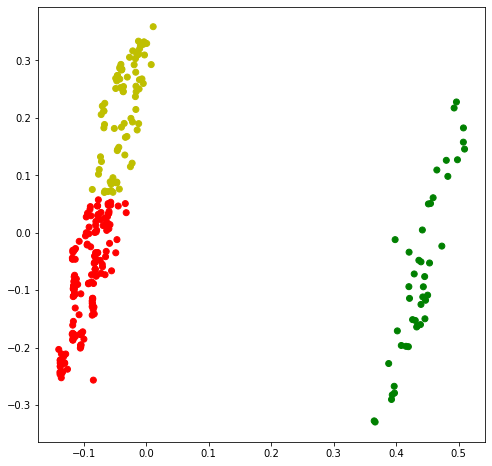

In [44]:
# Mapping Colours 
colour = {} 
colour[0] = 'y'
colour[1] = 'r'
colour[2] = 'g'
  
# Building the colour vector for each data point 
cv = [colour[lbl] for lbl in spectral_model_labels]
print("K-Means Clustering using SciKit Learn")  
plt.figure(figsize =(8,8)) 
plt.scatter(PCA_components['P1'], PCA_components['P2'], c = cv) 
plt.show()


# Feature Transformation - Part 2
Transform features add to dataset, compare results with the original.

### Spot new features using transformation

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


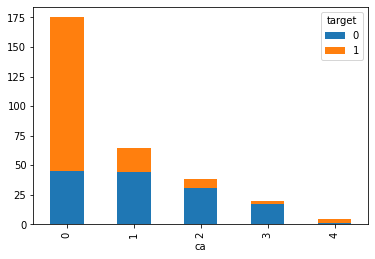

In [45]:
# Analyze categorical features agains the target and spot categories that are
# more likely to indicate a heart desease.

# Here we analyze ca against target

ca_target = pd.crosstab(df.ca, df.target)
ca_target.plot.bar(stacked=True);
ca_target

# When ca is 1,2,3 the target tends to be 0
# When ca is 0,4 the target tends to be 1
# We Spot a new feature!

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


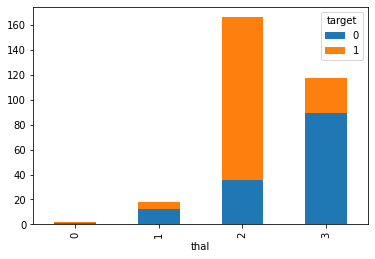

In [46]:
# Here we analyze thal against target

thal_target = pd.crosstab(df.thal, df.target)
thal_target.plot.bar(stacked=True);
thal_target

# When thal 2 target 1, else targe 0

# We spot a new feature

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


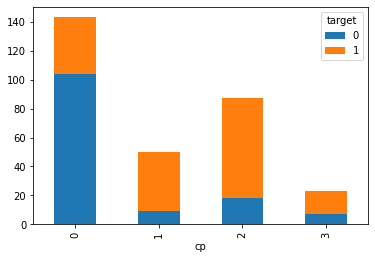

In [47]:
# Here we analyze cp against target

cp_target = pd.crosstab(df.cp, df.target)
cp_target.plot.bar(stacked=True);
cp_target

# target = 0 when cp = 0 , else target = 1  

### Create New features by feature transformation

In [48]:
# Transform and add new features using rules based on the analysis of the
# previous tree diagrams.
new_df = df

new_df['ca_1_0'] = [1 if x==0 or x==4 else 0 for x in new_df.ca]
new_df['thal_1_0'] = [1 if x==2 or x==0 else 0 for x in new_df.thal]
new_df['cp_1_0'] = [0 if x == 0 else 1 for x in new_df.cp]

new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ca_1_0,thal_1_0,cp_1_0
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1,1,0,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1,1,1,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1,1,1,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1,1,1,0


### Compare results with original

In [49]:
## Test using Random Forest and see if there is an improvement in accuracy
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','ca_1_0','thal_1_0','cp_1_0']

X = new_df[col_names] # Features
y = new_df.target # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# # Create Random Forest classifer object
clf = RandomForestClassifier(n_estimators=100)

# # Train Random Forest Classifer
clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Result:
# The accuracy increased from 0.72 to ~0.84

Accuracy: 0.8351648351648352


# Second Data Enrichment

In [50]:
# correlation between numerical features and fbs with target
num_with_fbs = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

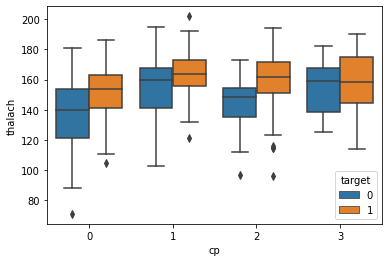

In [51]:
sns.boxplot(x='cp', y='thalach', data=new_df, hue='target');

# when cp=2 we can see that the blue and orange boxes are seperated 
# meaning that when cp=2, thalach tends to be target=1 if above ~155 and target=0
# if below ~155

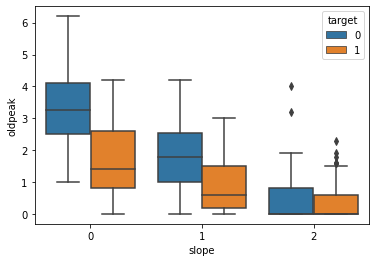

In [52]:
sns.boxplot(x='slope', y='oldpeak', data=new_df, hue='target');

# In this case, if slope is 0, oldpeak clearly separates target=1 from targe=0.

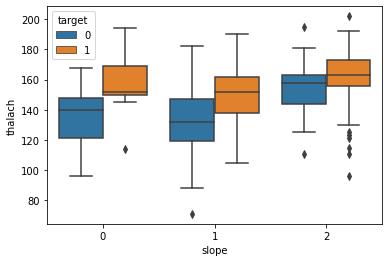

In [53]:
sns.boxplot(x='slope', y='thalach', data=new_df, hue='target');

#Also, if slope is 0, thalach separates target=1 from target=0

In [54]:
# Lets add these new features in out dataset. Later we will analyze if they are
# relevant.
new_df['cp_thalach'] = new_df['cp'] * new_df['thalach']
new_df['slope_oldpeak'] = new_df['slope'] * new_df['oldpeak']
new_df['slope_thalach'] = new_df['slope'] * new_df['thalach']

# "Creating a new feature using multiplication helps to keep track of how 
# features tend to behave as a whole. Therefore, it helps to map complex
# relationships between your features that can hint at special situations[*]".
# [*] https://www.dummies.com/programming/big-data/data-science/machine-learning-creating-features-data/

# Third Data Enrichment




## Scrape data and amalgamate

After the analysis made in the Feature Importance section, the most important categorical features are analized in correlation with other categorical features and the target.

In this case, we are going to evaluate fbs and slope.

### Correlation between fbs, categorical features and target

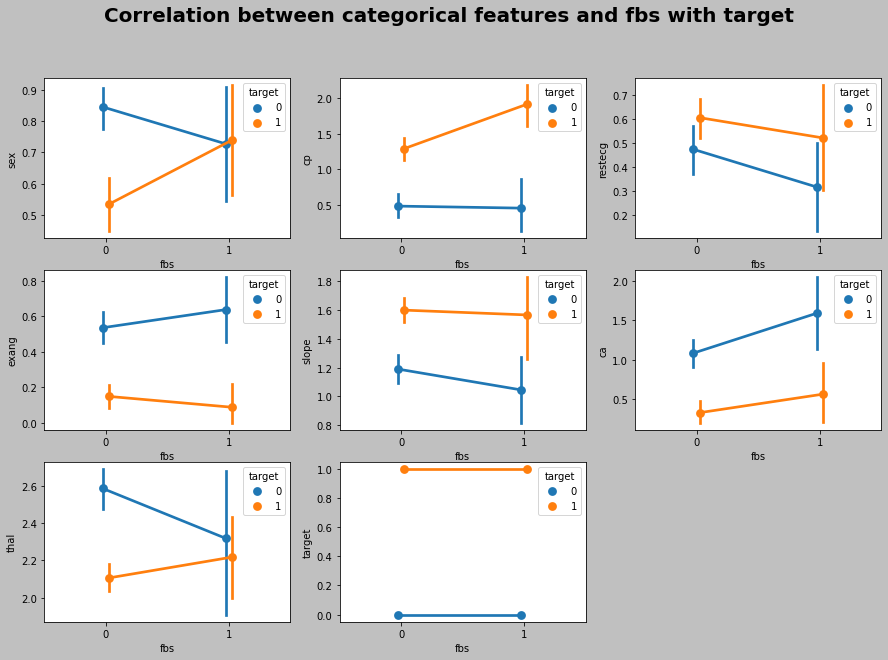

In [55]:
# correlation between categorical features and fbs with target
# let's try to create new features from it ("fbs")
cat_with_fbs = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.suptitle("Correlation between categorical features and fbs with target", fontsize=20, fontweight='bold')
fig.patch.set_facecolor('silver')
ax.flat[-1].set_visible(False) # to remove last plot

for i,n in enumerate(cat_with_fbs):
    plt.subplot(3,3,i+1)
    sns.pointplot(hue='target', y=n, x='fbs', data=new_df, kind='point', dodge=True);
    
# Because ca, cp and exang with fbs are well separated (Red line from blue line),
# is a sign that we can add more features

In [56]:
# fbs with "ca" "exange" and "cp"

new_df['ca_fbs'] = new_df['ca'] * new_df['fbs']
new_df['exang_fbs'] = new_df['exang'] * new_df['fbs']
new_df['cp_fbs'] = new_df['cp'] * new_df['fbs']

### Correlation between slope, categorical features and target

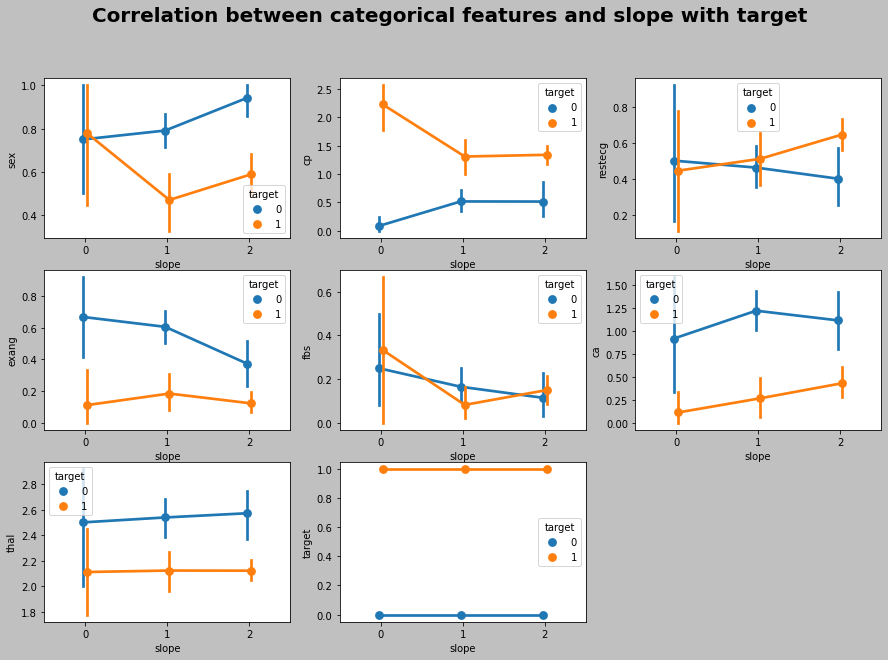

In [57]:
# correlation between categorical features and slope with target
# let's try to create new features from it ("slope")
cat_with_slope = ['sex', 'cp', 'restecg', 'exang', 'fbs', 'ca', 'thal', 'target']

fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.suptitle("Correlation between categorical features and slope with target", fontsize=20, fontweight='bold')
fig.patch.set_facecolor('silver')
ax.flat[-1].set_visible(False) # to remove last plot

for i,n in enumerate(cat_with_slope):
    plt.subplot(3,3,i+1)
    sns.pointplot(hue='target', y=n, x='slope', data=new_df, kind='point', dodge=True);
    
# Because ca, cp and exang with slope are well separated (Red line from blue line),
# is a sign that we can add more features

In [58]:
new_df['slope_ca'] = new_df['slope'] * new_df['ca']
new_df['slope_cp'] = new_df['slope'] * new_df['cp']
new_df['slope_exang'] = new_df['slope'] * new_df['exang']
# So far 6 new features were scraped.

### Correlation between sex, categorical features and target


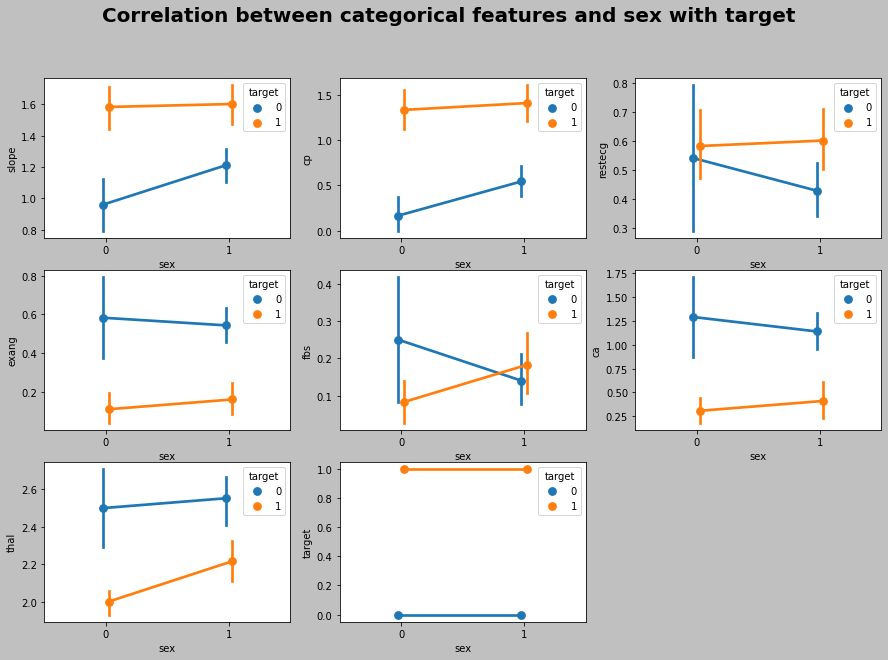

In [59]:
# correlation between categorical features and sex with target
# let's try to create new features from it ("sex")
cat_with_sex = ['slope', 'cp', 'restecg', 'exang', 'fbs', 'ca', 'thal', 'target']

fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.suptitle("Correlation between categorical features and sex with target", fontsize=20, fontweight='bold')
fig.patch.set_facecolor('silver')
ax.flat[-1].set_visible(False) # to remove last plot

for i,n in enumerate(cat_with_sex):
    plt.subplot(3,3,i+1)
    sns.pointplot(hue='target', y=n, x='sex', data=new_df, kind='point', dodge=True);
    
# Previously we plot sex-fbs and sex-slope and we could see data intersection.
# So, sex_fbs and sex_slope won't be considered as new features.

# The sex_restecg is intersecting, so it won'b be considered as a feature.

# Because ca, cp, exang and thal are separated, we are going to make an 
# independent analysis on them.

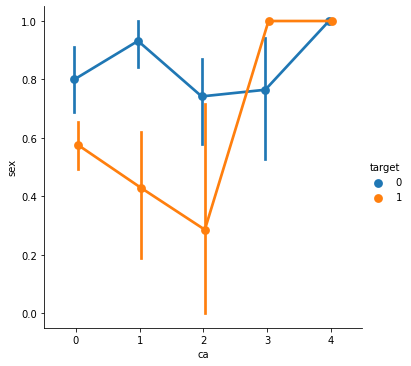

In [60]:
sns.catplot(x='ca', y='sex', data=new_df, hue='target', kind='point', dodge=True);
# No Intersection

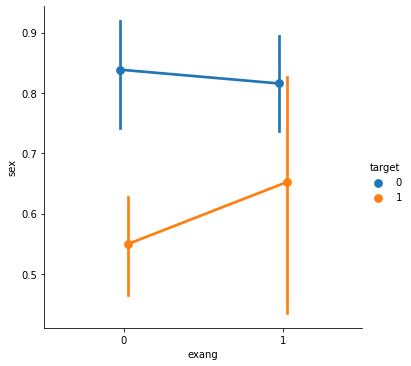

In [61]:
sns.catplot(x='exang', y='sex', data=new_df, hue='target', kind='point', dodge= True);
# Intesection

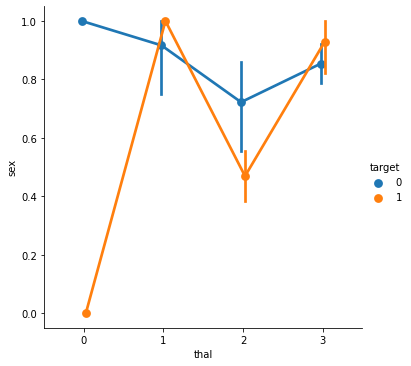

In [62]:
sns.catplot(x='thal', y='sex', data=new_df, hue='target', kind='point', dodge= True);
# Intesection

In [63]:
# After an individual analyzis, only sex_ca may be a potential new feature.
new_df['sex_ca'] = new_df['sex'] * new_df['ca']

**13 new features were added in total:**

1.   ca_1_0
2.   thal_1_0
3.   cp_1_0
4.   cp_thalach
5.   slope_oldpeak
6.   slope_thalach
7.   ca_fbs
8.   exang_fbsƒ
9.   cp_fbs
10.   slope_ca
11.   slope_cp
12.   slope_exang
13.   sex_ca





# Machine Learning Algorithm


In [64]:
#Import Libraries
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [65]:
X_data_reshape = df[col_names] # Features
y_data = df.target # Target variable

Split the data into Training set and Test data

### Different Classifiers

In [66]:
from time import time
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


Create Train and Test data

In [67]:
X, y = X_data_reshape, y_data

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)


### Muller Loop

Apply different classifiers to get the test scores and accuracy

### Compare Accuracy from different Classifiers

In [68]:
# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 83.61, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 83.61, Training time = 0.01 seconds
Classifier = RBF SVM, Score (test, accuracy) = 49.18, Training time = 0.02 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 83.61, Training time = 0.52 seconds
Classifier = Decision Tree, Score (test, accuracy) = 78.69, Training time = 0.00 seconds
Classifier = Random Forest, Score (test, accuracy) = 81.97, Training time = 0.03 seconds
Classifier = Neural Net, Score (test, accuracy) = 85.25, Training time = 0.83 seconds
Classifier = AdaBoost, Score (test, accuracy) = 80.33, Training time = 0.13 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 85.25, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 85.25, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Neural Net, Score (test, accu

The test score and accuracy from different classifiers is shown above

### Comparison of Calibration of Classifiers

Import Libraries

In [69]:
# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

np.random.seed(0)

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.neural_network import MLPClassifier

Plot different classifiers

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


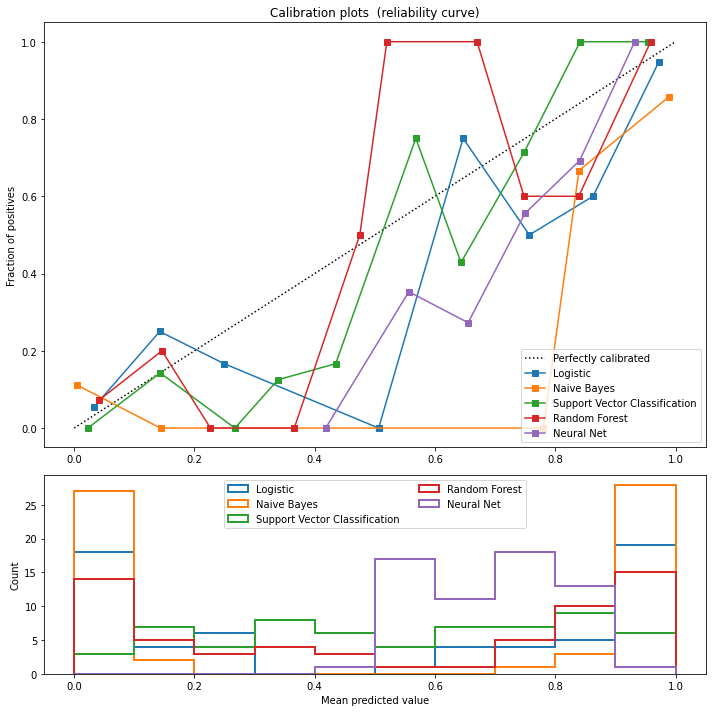

In [70]:
# Create classifiers
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
nn = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)

# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest'),
                  (nn, 'Neural Net')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


# Latent Variable and Manifold


# Metrics for Measuring Model

## Confusion Matrix and Accuracy, Precision, Recall, F1, RMSE

In [79]:
!pip install -U yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


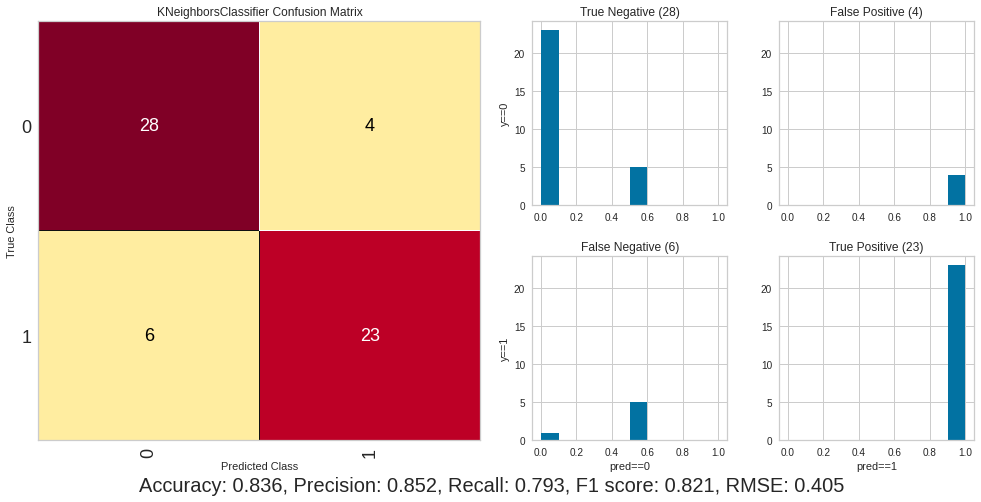

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


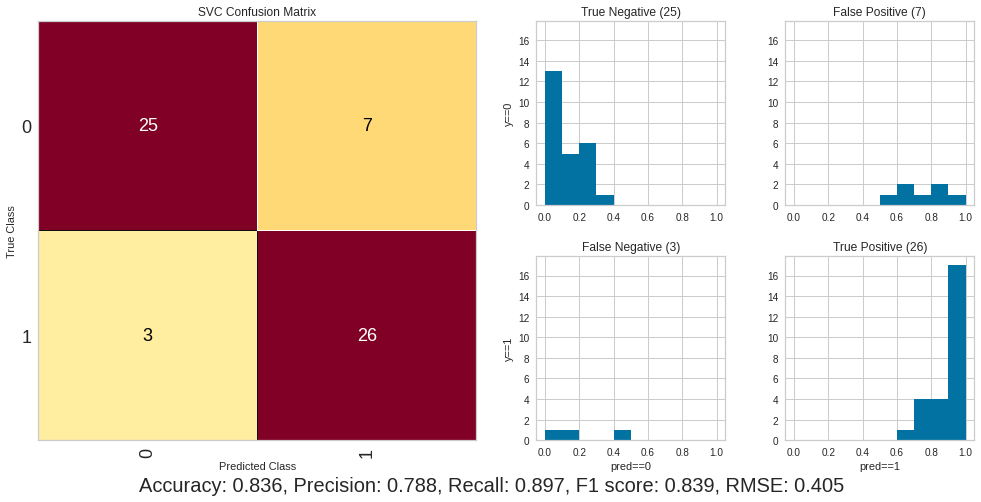

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


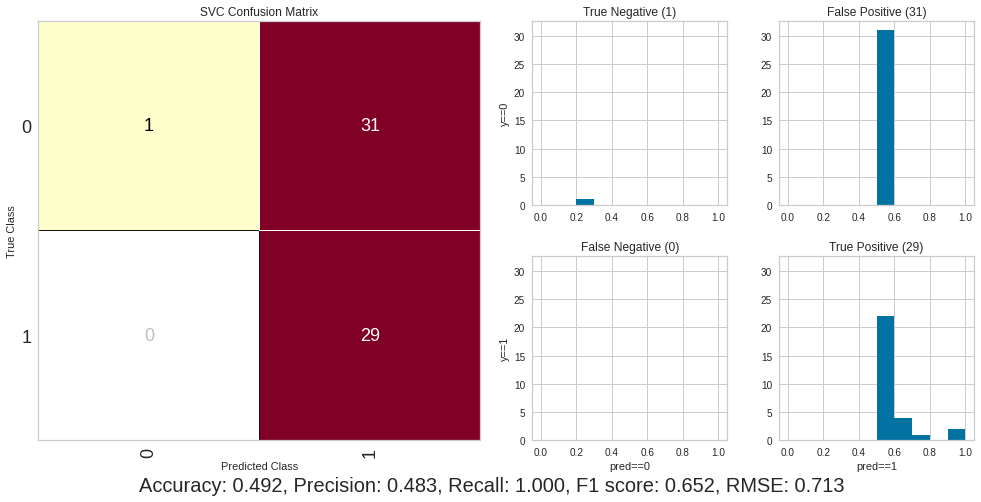

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


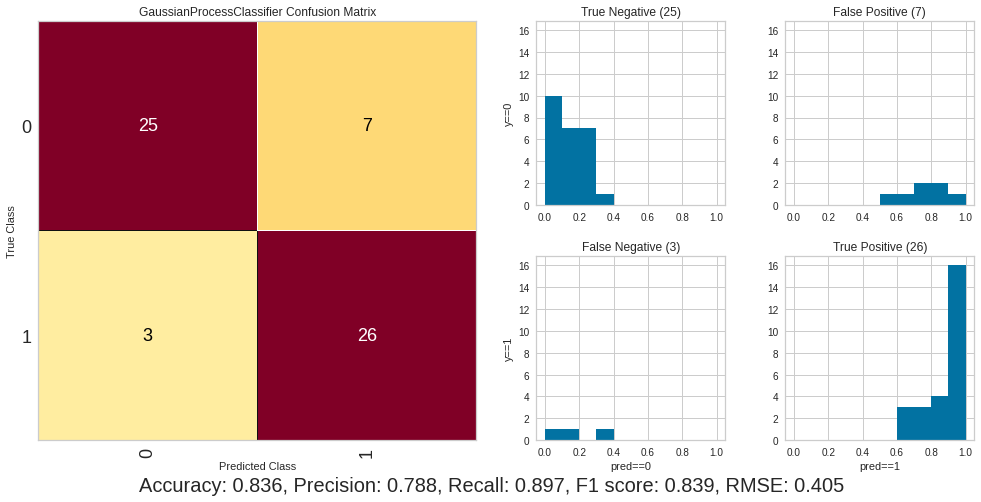

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


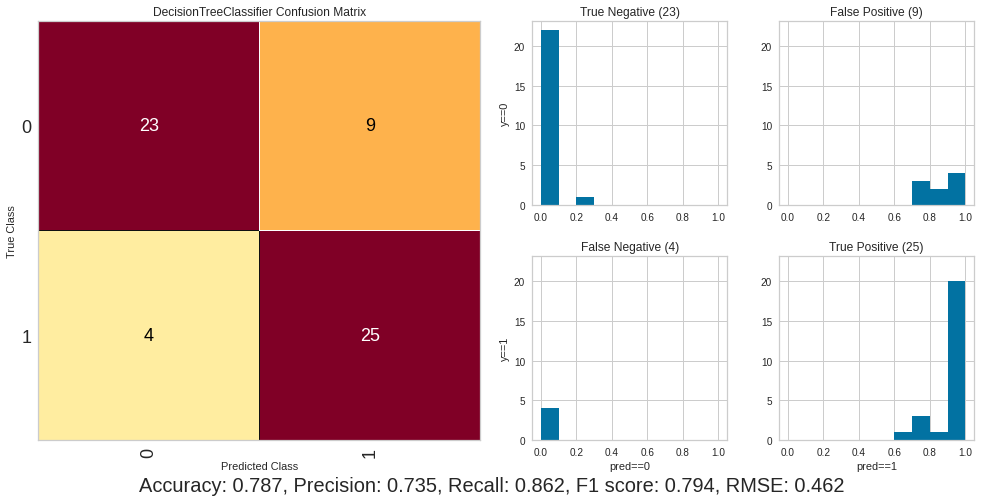

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


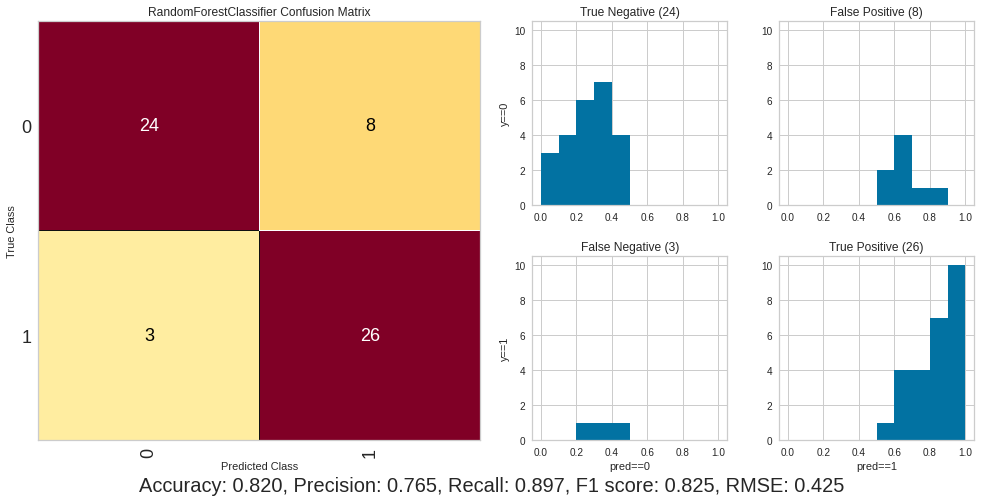

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


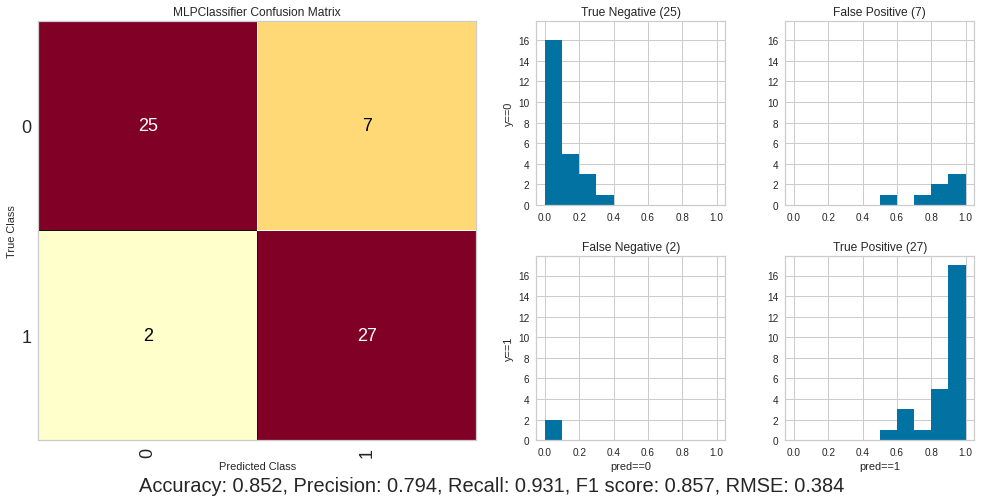

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


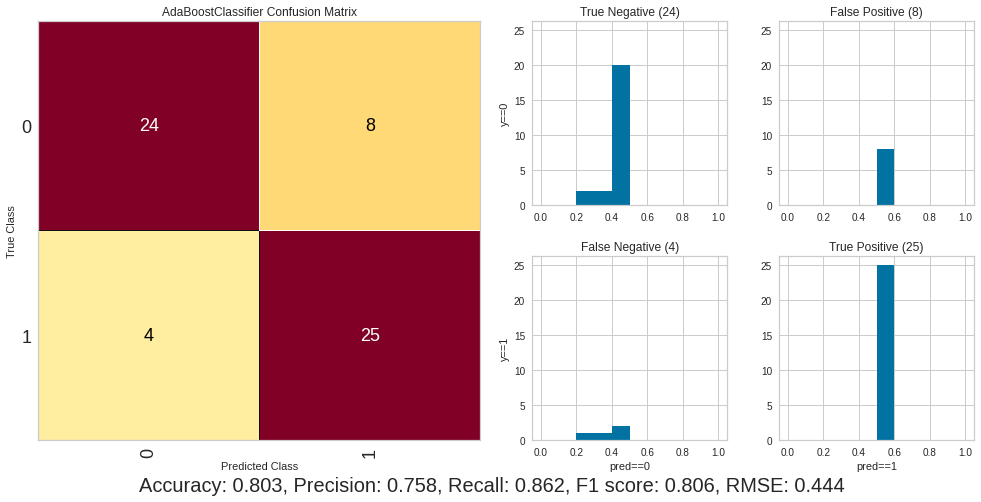

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


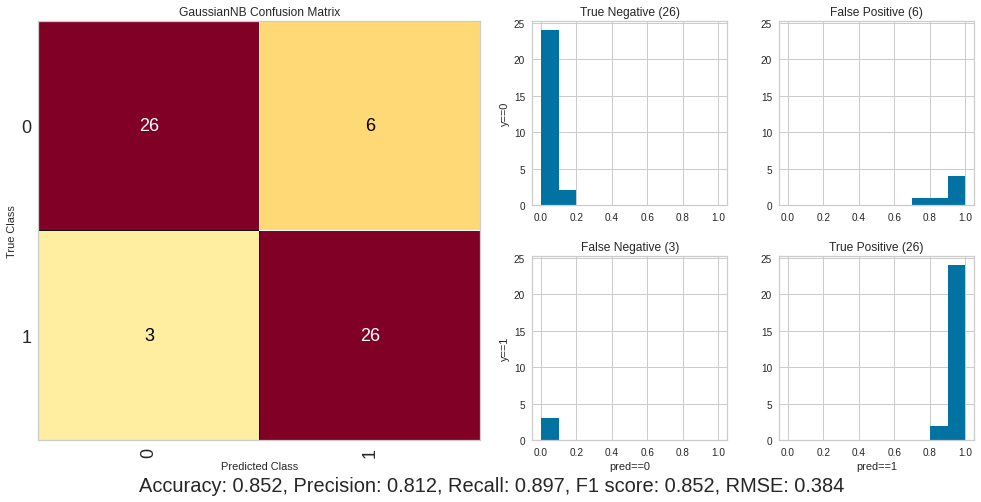

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


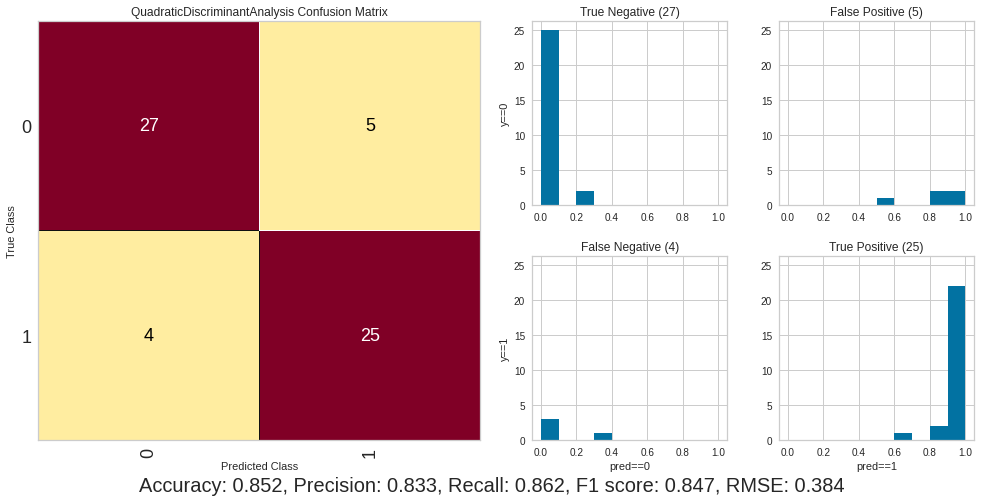

In [80]:
def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB
    return results.shape[0]

bins = np.arange(0, 1.01, 0.1)

for clf in classifiers:
    fig = plt.figure(figsize=(14, 7))
    ax1 = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
    ax2 = plt.subplot2grid((2, 4), (0, 2))
    ax3 = plt.subplot2grid((2, 4), (0, 3), sharex=ax2, sharey=ax2)
    ax4 = plt.subplot2grid((2, 4), (1, 2), sharex=ax2, sharey=ax2)
    ax5 = plt.subplot2grid((2, 4), (1, 3), sharex=ax2, sharey=ax2)

    cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax1)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)

    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

    df_predictions = pd.DataFrame({'y': y_test, 'y_proba': prob_pos})
    TN = show_quarter(df_predictions, "y==0 and y_proba <= 0.5", "y_proba", "True Negative", ax2, bins, y_label="y==0")
    FP = show_quarter(df_predictions, "y==0 and y_proba > 0.5", "y_proba", "False Positive", ax3, bins)
    TP = show_quarter(df_predictions, "y==1 and y_proba > 0.5", "y_proba", "True Positive", ax5, bins, x_label="pred==1")
    FN = show_quarter(df_predictions, "y==1 and y_proba <= 0.5", "y_proba", "False Negative", ax4, bins, x_label="pred==0", y_label="y==1")
    RMSE = mean_squared_error(y_test, clf.predict(X_test), squared=False)

    Acc = (TP+TN)/(TP+TN+FP+FN)
    Prec = TP/(TP+FP)
    Rec = TP/(TP+FN)
    F1 = 2*Prec*Rec/(Prec+Rec)

    txt = f'Accuracy: {Acc:.3f}, Precision: {Prec:.3f}, Recall: {Rec:.3f}, F1 score: {F1:.3f}, RMSE: {RMSE:.3f}'
    plt.figtext(0.5, 0, txt, wrap=True, horizontalalignment='center', fontsize=20)

    cm.show()

## Learning Curves

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [87]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


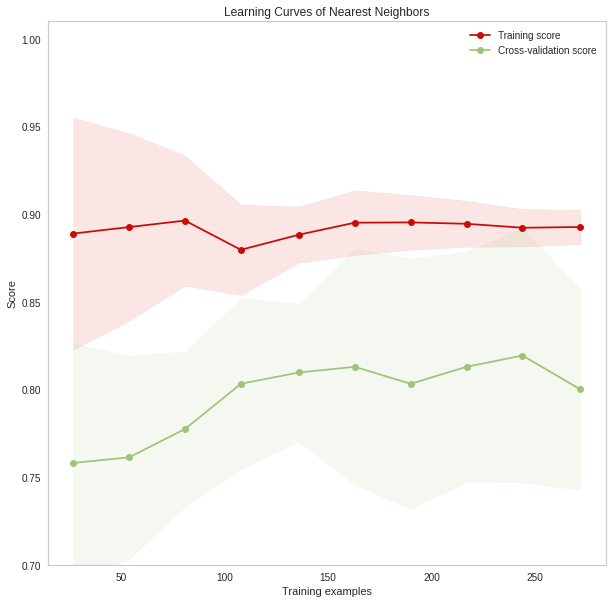

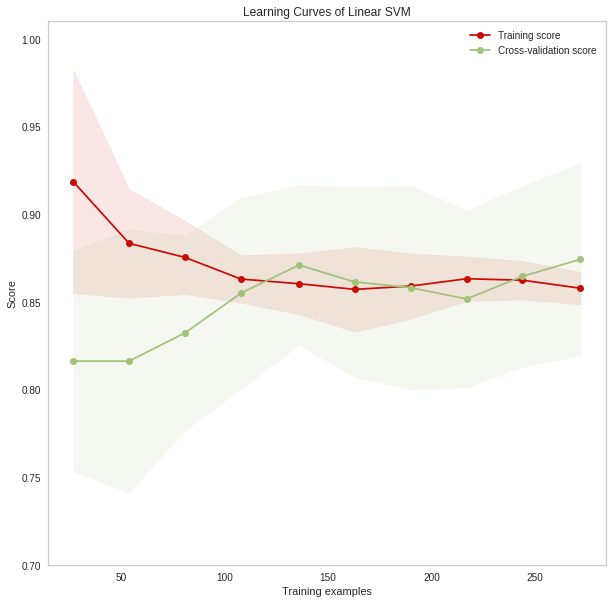

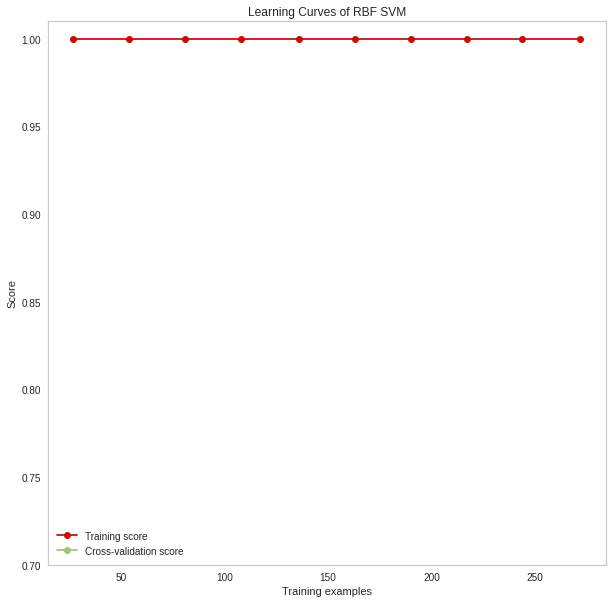

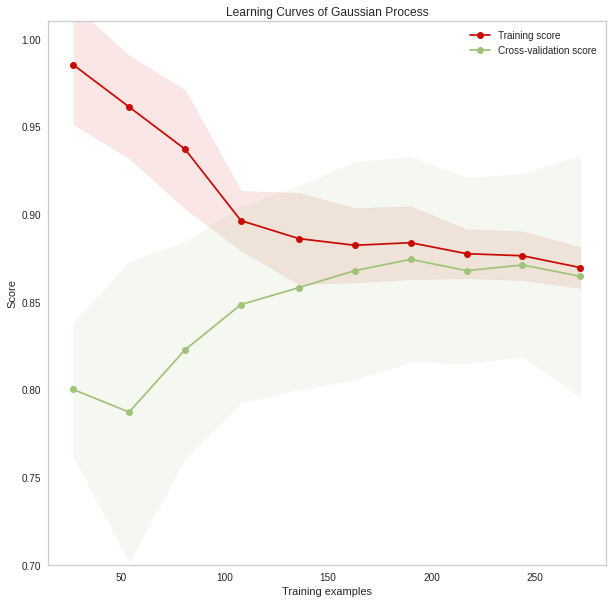

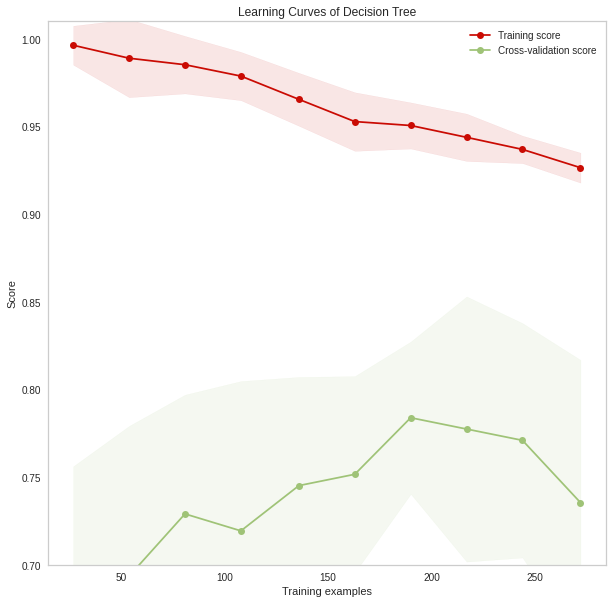

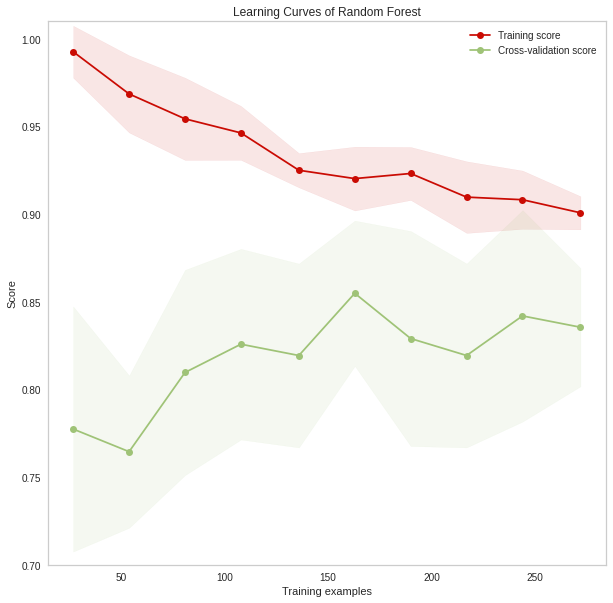

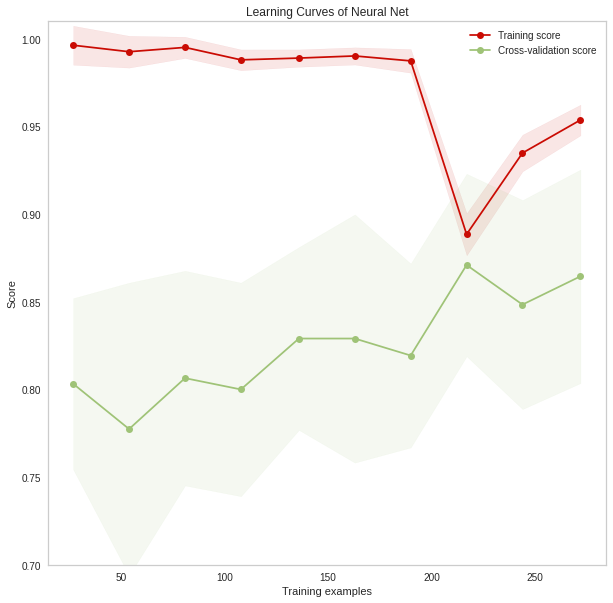

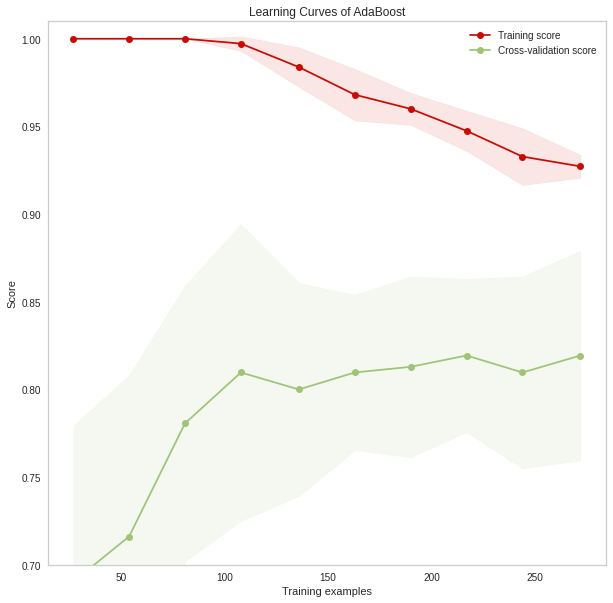

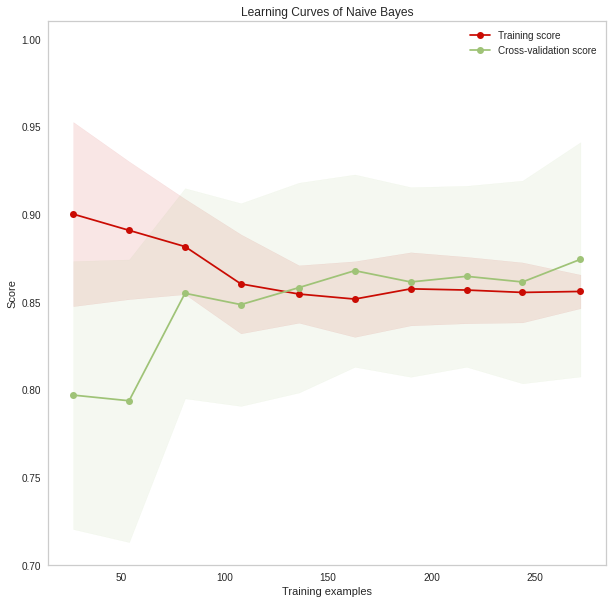

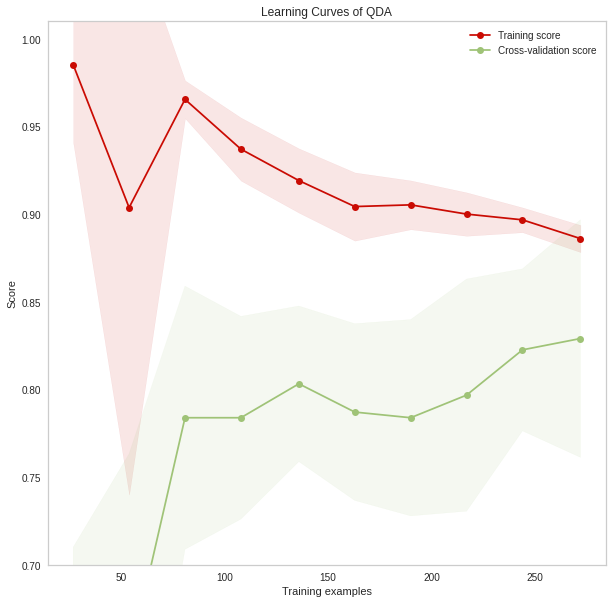

In [88]:
for name, clf in zip(names, classifiers):
    title = f"Learning Curves of {name}"
    cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
    train_sizes = np.linspace(.1, 1.0, 10)
    plot_learning_curve(clf, title, X, y, (0.7, 1.01), cv=cv, n_jobs=-1, train_sizes=train_sizes)

# Pickle models

In [99]:
import pickle
from zipfile import ZipFile
import os

In [100]:
with ZipFile('models.zip', 'w') as myzip:
    for name, clf in zip(names, classifiers):
        pickle.dump(clf, open(f'{name}_model.pickle', 'wb'))
        myzip.write(f'{name}_model.pickle')
        os.remove(f'{name}_model.pickle')

# References

Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

https://towardsdatascience.com/apache-spark-mllib-tutorial-7aba8a1dce6e

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
